# GRIP @ THE SPARKS FOUNDATION
# TASK 2:Prediction using Decision Tree Algorithm

 Name- Anjali Sonawane, Batch- July 2022

 Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.)

# Classification Problem

In this Classification task we will predict the Species of Iris that is Setosa, Versicolour, 
and Virginica based upon their length and width of sepals and petals. 
This is a Classification Regressor task as it involves just Five variables.

Libraries used: Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn.

# Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Anjali Sonawane\Downloads\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Data Preprocessing

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Dropping unnecessary column

In [11]:
df.drop('Id', axis=1, inplace=True)

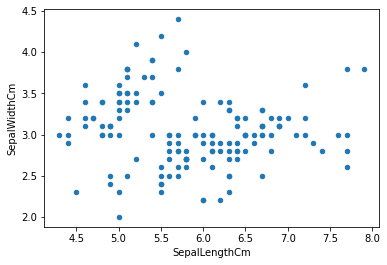

In [12]:
df.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")
plt.show()

# Visualization on data

 Scatter plot of data based on Sepal Length and Width features

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

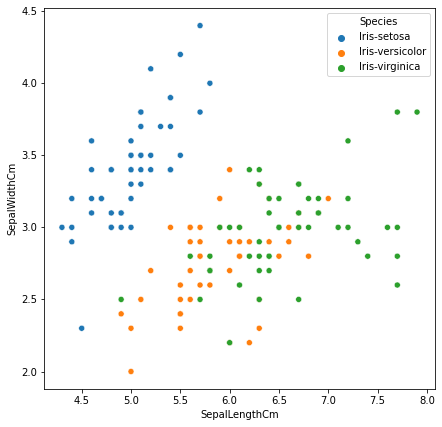

In [13]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species")

Scatter plot of data based on Petal Length and Width features

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

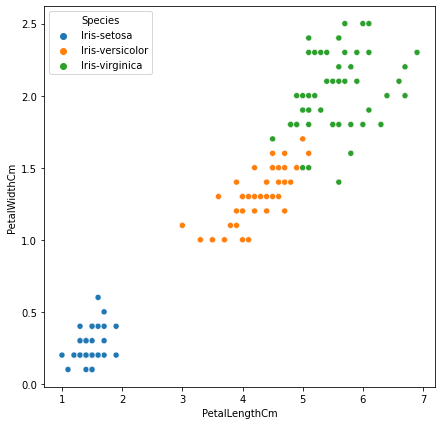

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species")

Heat Map is used to find out the correlation between different features in the dataset. 
High positive or negative value shows that the features have high correlation.This helps us to 
select the parmeters for machine learning.

<AxesSubplot:>

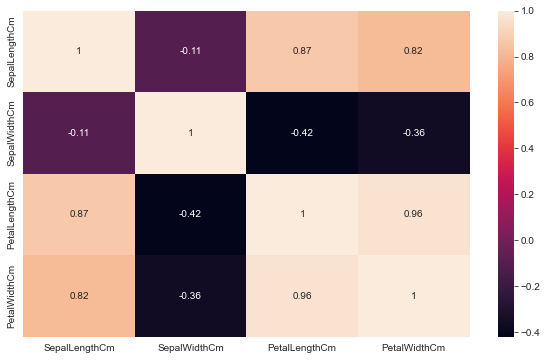

In [15]:
sns.set_style("dark")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="rocket")

There is a high corelation between: Sepal Length & Petal Length, Sepal Length & Petal Width, 
and Petal Length & Petal Width.

# Model Building

In [16]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

Splitting The dataset into train and test data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

Training Score

In [21]:
dt.score(X_train, y_train)

1.0

Testing Score

In [22]:
dt.score(X_test, y_test)

0.9736842105263158

In [23]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Classification accuracy is shown by Decision Regressor is 97.36%

In [31]:
# Predicting the class output for some random values of petal and sepal length and width

print("Class Names = Iris-setosa, Iris-virginica and Iris-versicolor")
print('Output = ',dt.predict([[4.7, 3.2, 1.3, 0.2]]))
print("Our model predicts the class as 0, that is, setosa.")

Class Names = Iris-setosa, Iris-virginica and Iris-versicolor
Output =  ['Iris-setosa']
Our model predicts the class as 0, that is, setosa.


Decision Tree Classifer Created Successfully


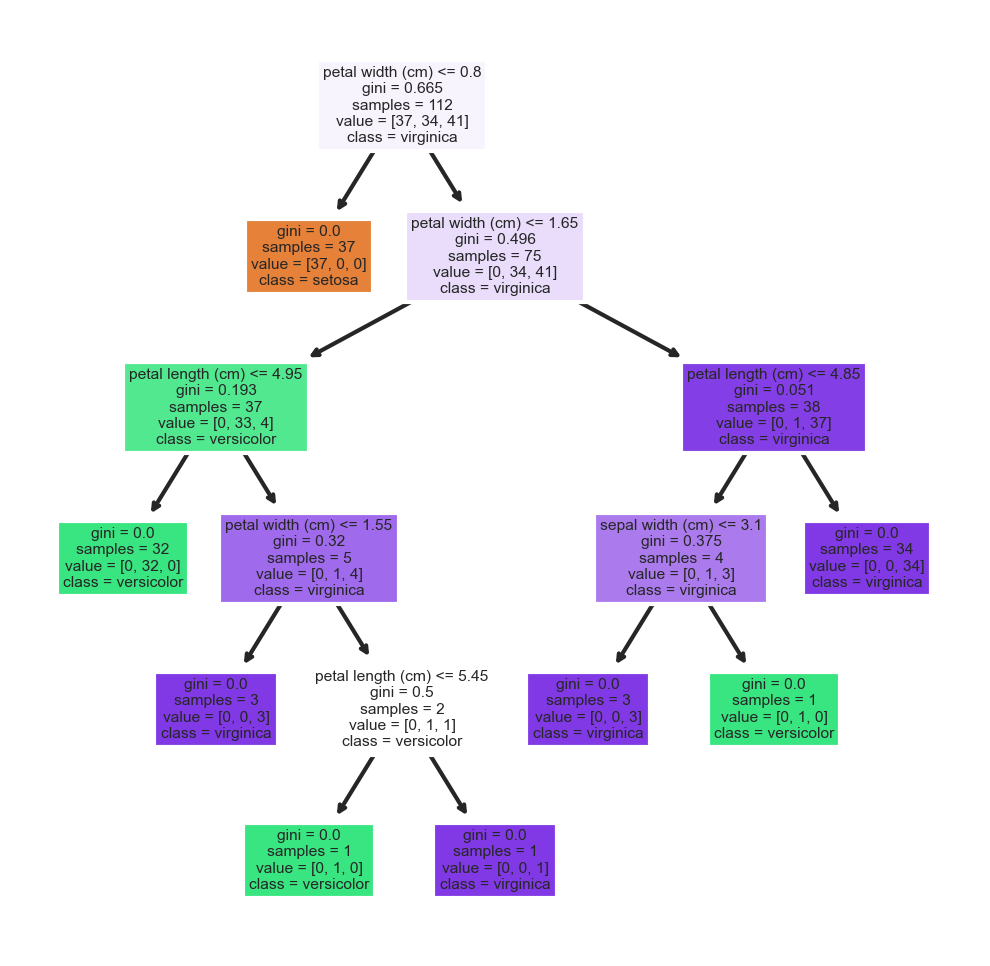

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifer Created Successfully')

import matplotlib.pyplot as plt
from sklearn import tree
a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);